In [11]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar  4 14:52:43 2020
@author: nooryoussef

Plot propensity at a site over time
"""
import numpy as np
import pandas as pd
import misc_functions as mf
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import scipy.stats as stats


plt.style.use('seaborn-talk')

In [12]:
def get_predicted_y(x, y):
    X = np.array(x).reshape(-1, 1)
    Y = np.array(y).reshape(-1,1)
    lm = linear_model.LinearRegression()
    model = lm.fit(X,Y)
    Y_pred= lm.predict(X)
    return(Y_pred)

In [13]:
protein  = '1pek'
trial = 50
site = 82

# load csv file and site-specific frequencies 
df = pd.read_csv("../data/" + protein + "_Ne2_t" + str(trial) + "_nsubs_5e2_stokes_diff_eq_seq.csv")
ss_freq = np.load("../output/" + protein + '_Ne2_t' + str(trial) + '_nsubs_5e2_ssfreq.npy') 

num_subs, num_sites = ss_freq.shape[0:2]
 

In [14]:
# conc metrics data
qhw_rst = pd.read_csv("../data/conc_data_1qhw_Ne2_nsubs_5e2_0_500.csv")
ppn_rst = pd.read_csv("../data/conc_data_2ppn_Ne2_nsubs_5e2_0_500.csv")
pek_rst = pd.read_csv("../data/conc_data_1pek_Ne2_nsubs_5e2_0_500.csv")

null_emp_df = pd.read_csv("../data/null_model_empirical_distribution.csv")

In [9]:
full_df = pd.DataFrame(qhw_rst)
full_df = full_df.append(pek_rst)
full_df = full_df.append(ppn_rst)

MSLR = full_df["M_SLR"]
MAMI = full_df["M_AMI"]
       
nn = len(full_df[(full_df["M_SLR"] <0) & (full_df["M_AMI"] <0)]) / len(full_df) *100
npp= len(full_df[(full_df["M_SLR"] <0) & (full_df["M_AMI"] >0)]) / len(full_df) *100
pn = len(full_df[(full_df["M_SLR"] >0) & (full_df["M_AMI"] <0)]) / len(full_df) *100
pp = len(full_df[(full_df["M_SLR"] >0) & (full_df["M_AMI"] >0)]) / len(full_df) *100


Text(0, 0.5, 'density')

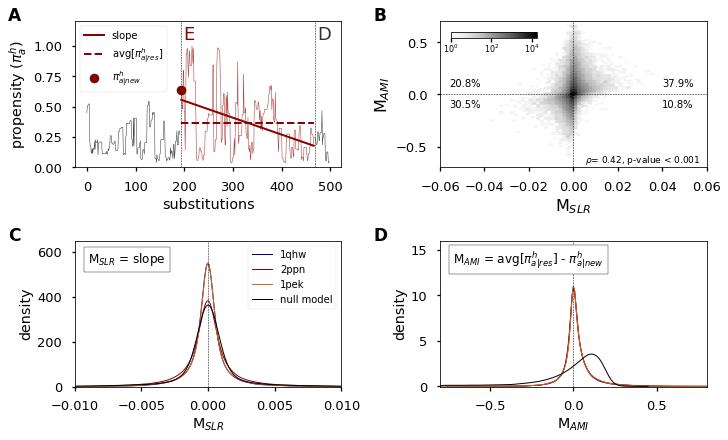

In [10]:
m = ['o', 'd', 's']
c = ['darkblue', 'darkred', 'chocolate']
l = ['1qhw', '2ppn', '1pek']

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,6), constrained_layout=True)

## SUBPLOT A ##
aa_1, aa_2, aa_3 = list(df[df['site'] == site]['res_aa']) #amino acid
is_1, is_2, is_3 = list(df[df['site'] == site]['start_sub']) #inital substituion 
ls_1, ls_2, ls_3 = list(df[df['site'] == site]['stop_sub']) #last subsitution     
c_1, c_2, c_3 = ['k', 'darkred', 'k']

# plot stat freq when resident
x_1 = [x for x in range(is_1, ls_1)]; y_1 = ss_freq[is_1: ls_1, site, aa_1]
ax1.plot(x_1, y_1, '-', c = c_1, linewidth=0.5, alpha = 0.8)

x_2 = [x for x in range(is_2, ls_2)]; y_2 = ss_freq[is_2: ls_2, site, aa_2]
ax1.plot(x_2, y_2, '-', c = c_2, linewidth=0.5, alpha = 0.8, zorder = 0)

x_3 = [x for x in range(is_3, ls_3)]; y_3= ss_freq[is_3: ls_3, site, aa_3]
ax1.plot(x_3, y_3, '-', c = c_3, linewidth=0.5, alpha = 0.8)

# plot vertical lines were substitutions occured
ax1.axvline(is_2, ls = '--', color = 'k', lw = 0.5)
ax1.axvline(is_3, ls = '--', color = 'k', lw = 0.5)

# label the resident amino acid 
ax1.text(is_2 + 5,  1.05, "".join([idx for idx in mf.AminoAcid if mf.AminoAcid[idx] == aa_2]), fontsize = 18, color = c_2)
ax1.text(is_3 + 5,  1.05, "".join([idx for idx in mf.AminoAcid if mf.AminoAcid[idx] == aa_3]), fontsize = 18, color = c_3, alpha = 0.8)

#  linear regressions
y2_pred = get_predicted_y(x_2, y_2)
ax1.plot(x_2, y2_pred, color='darkred', lw = 2, label = "slope", zorder = 3)

# plot metrics
ax1.scatter(is_2, ss_freq[is_2, site, aa_2], marker = "o", color = "darkred", edgecolor = "k", zorder = 3, label = "$\pi^h_{a|new}$")
ax1.plot(x_2, [np.mean(y_2)]*len(x_2), color='darkred', lw = 2, label = "avg[$\pi_{a|res}^h$]", ls = "--")
ax1.legend(fontsize = 10) 

## SUBPLOT B ## 
hb = ax2.hexbin(MSLR, MAMI, gridsize=100, bins='log', cmap= "Greys", mincnt = 1)
# color bar 
cbaxes = f.add_axes([0.62, 0.92, 0.12, 0.015]) 
cbar= f.colorbar(hb, orientation = "horizontal", cax = cbaxes, ax = ax2)
cbar.ax.xaxis.set_tick_params(pad=0.7, labelsize = 8)

ax2.text(-0.056, -0.05, "%.1f" % nn + "%" , fontsize=10, va='top')
ax2.text(-0.056,  0.15, "%.1f" % npp + "%" , fontsize=10, va='top')
ax2.text( 0.04, -0.05, "%.1f" % pn + "%" , fontsize=10, va='top')
ax2.text( 0.04,  0.15, "%.1f" % pp + "%" , fontsize=10, va='top')

r, p = stats.spearmanr(full_df["M_SLR"], full_df["M_AMI"])
ax2.text(0.005, -0.65, r"$\rho$= %.2f" % r + ", p-value < 0.001" , fontsize=9)

## SUBPLOT C ## 
# plot distribution of M_SLR 
sns.kdeplot(qhw_rst["M_SLR"], clip = (-0.01, 0.01), color = c[0], lw= 1, label= l[0], ax = ax3)
sns.kdeplot(ppn_rst["M_SLR"], clip = (-0.01, 0.01), color = c[1], lw= 1, label= l[1], ax = ax3)
sns.kdeplot(pek_rst["M_SLR"], clip = (-0.01, 0.01), color = c[2], lw= 1, label= l[2], ax = ax3)
sns.kdeplot(null_emp_df["M_SLR"], clip = (-0.01, 0.01), color = "k", lw= 1, label= "null model", ax = ax3)
ax3.legend(fontsize = 10) 


# plot distribution of M_AMI 
sns.kdeplot(qhw_rst["M_AMI"], color = c[0], lw= 1, ax = ax4)
sns.kdeplot(ppn_rst["M_AMI"], color = c[1], lw= 1, ax = ax4)
sns.kdeplot(pek_rst["M_AMI"], color = c[2], lw= 1, ax = ax4)
sns.kdeplot(null_emp_df["M_AMI"], color = "k", lw= 1,  ax = ax4)


#subplot labels 
ax1.text(-0.25, 1.1, "A", transform=ax1.transAxes, fontsize=17, fontweight='bold', va='top')
ax2.text(-0.25, 1.1, "B", transform=ax2.transAxes, fontsize=17, fontweight='bold', va='top')
ax3.text(-0.25, 1.1, "C", transform=ax3.transAxes, fontsize=17, fontweight='bold', va='top')
ax4.text(-0.25, 1.1, "D", transform=ax4.transAxes, fontsize=17, fontweight='bold', va='top')

#metric labels
ax3.text(0.05, 0.85, "M$_{SLR}$ = slope", transform=ax3.transAxes, fontsize=12, bbox=dict(facecolor='w'))
ax4.text(0.05, 0.85, "M$_{AMI}$ = avg[$\pi_{a|res}^h$] - $\pi^h_{a|new}$", transform=ax4.transAxes, fontsize=12, bbox=dict(facecolor='w'))

# add vertical and horizontal lines 
ax2.axvline(0, ls = "--", color = "k", linewidth= 0.5)
ax2.axhline(0, ls = "--", color = "k", linewidth= 0.5)

ax3.axvline(0, ls = "--", color = "k", linewidth= 0.5)
ax4.axvline(0, ls = "--", color = "k", linewidth= 0.5)

# axis limits 
ax1.set_ylim(0,1.2)
ax1.set_yticks([0, 0.25, 0.5, 0.75, 1])

ax2.set_ylim(-0.7, 0.7)
ax2.set_xlim(-0.06, 0.06)

ax3.set_xlim(-0.01, 0.01)
ax3.set_ylim(-0.05, 650)

ax4.set_xlim(-0.8, 0.8)
ax4.set_ylim(-0.05, 16)


# axis labels 
ax1.set_xlabel("substitutions")
ax1.set_ylabel("propensity ($\pi_a^{h})$")

ax2.set_xlabel("M$_{SLR}$", fontsize = 16)
ax2.set_ylabel("M$_{AMI}$", fontsize = 16)

ax3.set_xlabel("M$_{SLR}$")
ax3.set_ylabel("density")

ax4.set_xlabel("M$_{AMI}$")
ax4.set_ylabel("density")


#plt.savefig('../figures/Figure2_new.png', dpi = 450, bbox_inches = 'tight')


In [13]:
print(null_emp_df["M_AMI"].median())
print(MAMI.median())

0.05457948666452739
0.006704207205928032
